# Análisis estadístico de Data Products

In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('Data/DP6_covid19-peru_info-fallecidos.csv')

In [159]:
# Convertir a formato fecha
df['fecha_fallecimiento'] = pd.to_datetime(df['fecha_fallecimiento'], format = '%Y-%m-%d')

lst_dates = ['fecha_vacuna_1', 'fecha_vacuna_2', 'fecha_vacuna_3']
for date in lst_dates:
    df.loc[:,date] = pd.to_datetime(df[date], format = '%Y%m%d')
del lst_dates, date

In [160]:
df

,id_persona,fecha_fallecimiento,year,epi_week,time_days,sexo,edad,edad_cat,departamento,vacunado,dosis_1,fecha_vacuna_1,id_vacuna_1,dosis_2,fecha_vacuna_2,id_vacuna_2,dosis_3,fecha_vacuna_3,id_vacuna_3
0,36527082.0,2020-03-03,2020,10,1,1,63,5,22,0,0,NaT,0,0,NaT,0,0,NaT,0
1,36401995.0,2020-03-04,2020,10,2,1,85,7,22,0,0,NaT,0,0,NaT,0,0,NaT,0
2,36853977.0,2020-03-07,2020,10,5,2,24,1,16,0,0,NaT,0,0,NaT,0,0,NaT,0
3,NaN,2020-03-11,2020,11,9,2,78,6,20,0,0,NaT,0,0,NaT,0,0,NaT,0
4,36614476.0,2020-03-14,2020,11,12,1,4,0,15,0,0,NaT,0,0,NaT,0,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203371,9346434.0,2022-01-14,2022,2,683,2,59,4,15,0,0,NaT,0,0,NaT,0,0,NaT,0
203372,11184318.0,2022-01-14,2022,2,683,1,64,5,15,1,1,2021-02-25,6,1,2021-03-18,6,0,NaT,0
203373,8196728.0,2022-01-14,2022,2,683,1,64,5,15,1,1,2021-06-01,5,1,2021-06-23,5,1,2021-12-13,5
203374,17398883.0,2022-01-14,2022,2,683,1,64,5,8,1,1,2021-06-02,5,1,2021-06-25,5,0,NaT,0


In [161]:
# Dataframe de fallecidos Vacunados a partir de X fecha
df_falVac = df[((df.year >= 2021) & (df.epi_week >= 45)) | (df.year >= 2022)]

# Columna de No Vacunados, para contabilizar a quienes no tienen ni la 1ra dosis
df_falVac['no_vac'] = np.where(df_falVac['dosis_1'] == 0, 1, 0)
df_falVac['total_dosis'] = df_falVac.dosis_1 + df_falVac.dosis_2 + df_falVac.dosis_3

df_falVac = df_falVac[['year','epi_week', 'no_vac','dosis_1', 'dosis_2', 'dosis_3', 'total_dosis' ]]

ct_falVac = pd.crosstab(index = [df_falVac['year'],df_falVac['epi_week']],
                        columns = df_falVac['total_dosis'])

ct_falVac

total_dosis      0   1    2   3
year epi_week                  
2021 45         74  19  113   1
     46         95  13  134   2
     47         84  10  149   8
     48         97  13  153   5
     49        114  12  134  10
     50        102  17  140  18
     51         96  14  123  10
     52        100  26  114  34
2022 1          92  30  136  34
     2          77  21  145  56

<AxesSubplot:xlabel='year,epi_week'>

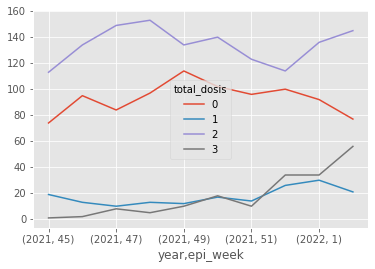

In [162]:
ct_falVac.plot()

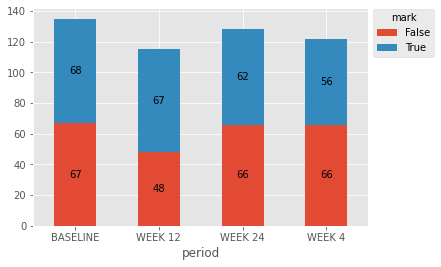

In [163]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n = 500
np.random.seed(365)
mark = np.random.choice([True, False], n)
periods = np.random.choice(['BASELINE', 'WEEK 12', 'WEEK 24', 'WEEK 4'], n)

df = pd.DataFrame({'mark': mark, 'period': periods})
ct = pd.crosstab(df.period, df.mark)
    
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')